# Random Forest
### Parameters:
System:
* **abilities**:
    * **cha**
    * **con**
    * **dex**
    * **int**
    * **str**
    * **wis**
* **attributes**
    * **hp**
    * **ac**
    * **perception**
    * **speed** (*land speed*)
        * **other speeds**: fly, climb, swim
    * **num immunities**
    * **resistances**: fire, cold, electricity, acid, piercing, slashing, physical, bludgeoning, mental, poison, all-damage
    * **weaknesses**: cold-iron, good, fire, cold, area-damage, splash-damage, evil, slashing
* **saves**
    * **fortitude**
    * **reflex**
    * **will**
* **resources**
    * **focus**

Items
* **items**
    * **melee**
    * **ranged**
    * **spells nr**

### Prediction: *level*

In [1]:
import numpy as np
import pandas as pd
import sys

import os
import pathlib

sys.path.append("../../..")
from training.creating_dataset import load_and_preprocess_data


current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path).parent.parent.parent / "pathfinder_2e_data"
DATASET_FILES = [
    "abomination-vaults-bestiary.db",
    "age-of-ashes-bestiary.db",
    "agents-of-edgewatch-bestiary.db",
    "april-fools-bestiary.db",
    "blog-bestiary.db",
    "blood-lords-bestiary.db",
    "book-of-the-dead-bestiary.db",
    "crown-of-the-kobold-king-bestiary.db",
    "extinction-curse-bestiary.db",
    "fall-of-plaguestone.db",
    "fists-of-the-ruby-phoenix-bestiary.db",
    "gatewalkers-bestiary.db",
    "impossible-lands-bestiary.db",
    "kingmaker-bestiary.db",
    "malevolence-bestiary.db",
    "menace-under-otari-bestiary.db",
    "monsters-of-myth-bestiary.db",
    "mwangi-expanse-bestiary.db",
    "night-of-the-gray-death-bestiary.db",
    "npc-gallery.db",
    "one-shot-bestiary.db",
    "outlaws-of-alkenstar-bestiary.db",
    "pathfinder-bestiary-2.db",
    "pathfinder-bestiary-3.db",
    "pathfinder-bestiary.db",
    "pathfinder-dark-archive.db",
    "pfs-introductions-bestiary.db",
    "pfs-season-1-bestiary.db",
    "pfs-season-2-bestiary.db",
    "pfs-season-3-bestiary.db",
    "pfs-season-4-bestiary.db",
    "quest-for-the-frozen-flame-bestiary.db",
    "shadows-at-sundown-bestiary.db",
    "strength-of-thousands-bestiary.db",
    "the-slithering-bestiary.db",
    "travel-guide-bestiary.db",
    "troubles-in-otari-bestiary.db",
]

DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
features = [
    "cha",
    "con",
    "dex",
    "int",
    "str",
    "wis",
    "ac",
    "hp",
    "perception",
    "fortitude",
    "reflex",
    "will",
    "focus",
    "land_speed",
    "num_immunities",
    "fly",
    "swim",
    "climb",
    "fire_resistance",
    "cold_resistance",
    "electricity_resistance",
    "acid_resistance",
    "piercing_resistance",
    "slashing_resistance",
    "physical_resistance",
    "bludgeoning_resistance",
    "mental_resistance",
    "poison_resistance",
    "all-damage_resistance",
    "cold-iron_weakness",
    "good_weakness",
    "fire_weakness",
    "cold_weakness",
    "area-damage_weakness",
    "splash-damage_weakness",
    "evil_weakness",
    "slashing_weakness",
    "melee",
    "ranged",
    "spells",
]

df = load_and_preprocess_data(
    DATASET_PATHS,
    characteristics=features,
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3690 entries, 0 to 4327
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wis                     3690 non-null   float64
 1   fortitude               3690 non-null   float64
 2   will                    3690 non-null   float64
 3   focus                   3690 non-null   int32  
 4   num_immunities          3690 non-null   int64  
 5   dex                     3690 non-null   float64
 6   reflex                  3690 non-null   float64
 7   level                   3690 non-null   int64  
 8   land_speed              3690 non-null   float64
 9   str                     3690 non-null   float64
 10  cha                     3690 non-null   float64
 11  book                    3690 non-null   object 
 12  int                     3690 non-null   float64
 13  hp                      3690 non-null   int32  
 14  perception              3690 non-null   

In [3]:
df.head()

,wis,fortitude,will,focus,num_immunities,dex,reflex,level,land_speed,str,...,spells_nr_lvl_4,spells_nr_lvl_5,spells_nr_lvl_6,spells_nr_lvl_7,spells_nr_lvl_8,spells_nr_lvl_9,melee_max_bonus,avg_melee_dmg,ranged_max_bonus,avg_ranged_dmg
0,3.0,15.0,20.0,1,5,3.0,18.0,9,20.0,6.0,...,2,0,0,0,0,0,21,19.0,0,0.0
1,3.0,22.0,19.0,0,0,3.0,17.0,10,40.0,7.0,...,0,0,0,0,0,0,23,22.0,0,0.0
2,3.0,7.0,9.0,0,0,3.0,11.0,2,30.0,4.0,...,0,0,0,0,0,0,9,6.5,8,6.5
3,3.0,17.0,15.0,0,0,4.0,16.0,8,30.0,3.0,...,0,0,0,0,0,0,20,18.0,20,9.5
4,4.0,14.0,18.0,0,1,6.0,21.0,9,0.0,-5.0,...,0,0,0,0,0,0,17,21.5,0,0.0


## Train test split

### Chronological split

In [4]:
from training.splitting_dataset import split_dataframe


os.chdir("../../../training")
X_train, X_test, y_train, y_test = split_dataframe(df, test_size=0.31)
os.chdir("../notebooks/models/random_forest")

In [5]:
X_train = X_train.drop(columns=["book"])
X_test = X_test.drop(columns=["book"])

In [6]:
X_train = X_train.astype("int64")
y_train = y_train.astype("int64")

### Random split

In [7]:
(
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
) = split_dataframe(df, chronological_split=False)

In [8]:
X_train_random_split = X_train_random_split.drop(columns=["book"])
X_test_random_split = X_test_random_split.drop(columns=["book"])

## Random Forest

### With chronological split

In [9]:
from sklearn.ensemble import RandomForestRegressor


rf_reg = RandomForestRegressor(n_estimators=500, max_depth=2, random_state=0, n_jobs=-1)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, n_estimators=500, n_jobs=-1, random_state=0)

In [10]:
y_pred_train = rf_reg.predict(X_train)
y_pred_test = rf_reg.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 1.59
MAE: 1.25


In [12]:
results = pd.DataFrame(
    data={
        "Split type": [],
        "Tuning type": [],
        "Set of features": [],
        "RMSE": [],
        "MAE": [],
    }
)

results.loc[0] = ["chronological", "default", "full", rmse, mae]

###### MAE by level

In [13]:
from training.results import plot_mae_by_level

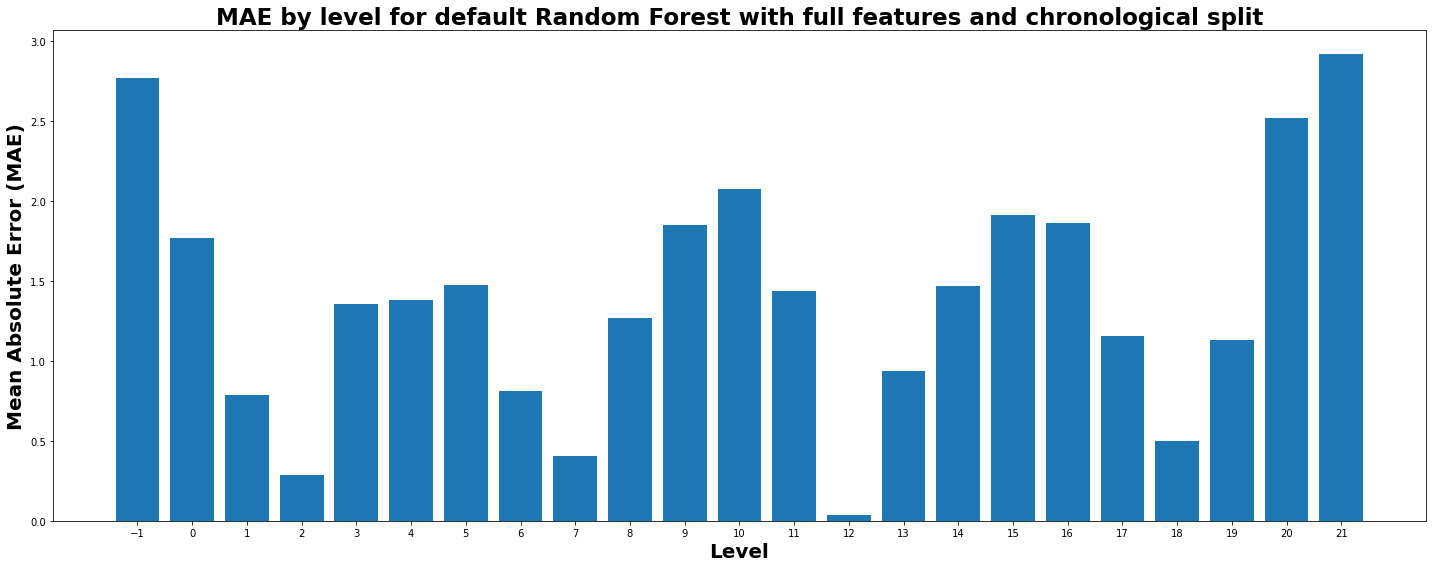

In [14]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for default Random Forest with full features and chronological split",
)

In [15]:
from training.results import evaluate_round_predictions, plot_confusion_matrix


evaluate_round_predictions([0.5, 0.33, 0.45], y_test, y_pred_test)

Default:
RMSE: 1.59

Round type: 0.5
RMSE: 1.65

Round type: 0.33
RMSE: 1.66

Round type: 0.45
RMSE: 1.66



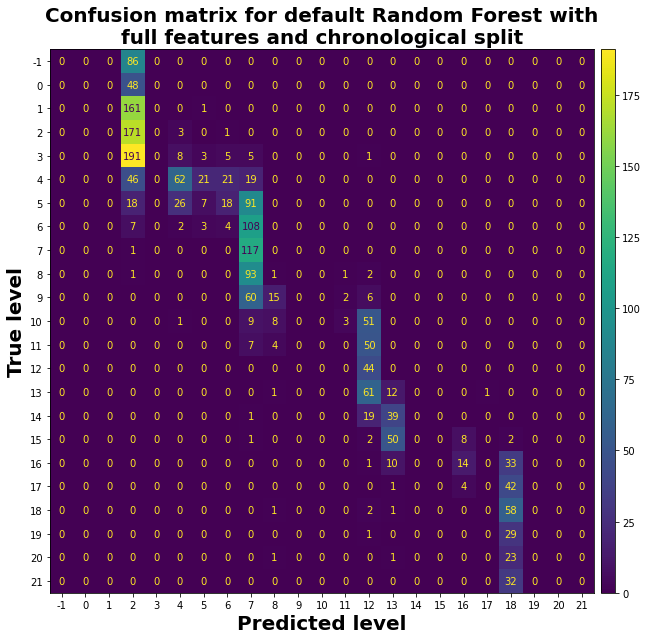

In [16]:
plot_confusion_matrix(
    y_pred_test,
    y_test,
    title="Confusion matrix for default Random Forest with\nfull features and chronological split",
)

#### Tuning

In [17]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=100, stop=800, num=8)]
max_features = [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_depth = list(range(10, 111, 10)) + [None]

hyper_params = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
}

hyper_params

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
 'max_features': [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}

In [18]:
rf = RandomForestRegressor(random_state=0, n_jobs=-1)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=hyper_params,
    n_iter=100,
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=2,
    random_state=42,
    return_train_score=True,
)

rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ...max_depth=70, max_features=0.2, n_estimators=200; total time=   0.6s
[CV] END ...max_depth=70, max_features=0.2, n_estimators=200; total time=   0.5s
[CV] END ...max_depth=70, max_features=0.2, n_estimators=200; total time=   0.5s
[CV] END ...max_depth=30, max_features=0.4, n_estimators=700; total time=   2.1s
[CV] END ...max_depth=30, max_features=0.4, n_estimators=700; total time=   2.1s
[CV] END ...max_depth=30, max_features=0.4, n_estimators=700; total time=   2.1s
[CV] END ...max_depth=90, max_features=0.3, n_estimators=200; total time=   0.5s
[CV] END ...max_depth=90, max_features=0.3, n_estimators=200; total time=   0.5s
[CV] END ...max_depth=90, max_features=0.3, n_estimators=200; total time=   0.5s
[CV] END .max_depth=None, max_features=0.1, n_estimators=800; total time=   2.4s
[CV] END .max_depth=None, max_features=0.1, n_estimators=800; total time=   2.2s
[CV] END .max_depth=None, max_features=0.1, n_

[CV] END ...max_depth=30, max_features=0.1, n_estimators=800; total time=   2.2s
[CV] END ...max_depth=30, max_features=0.2, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=30, max_features=0.2, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=30, max_features=0.2, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=20, max_features=0.4, n_estimators=600; total time=   1.9s
[CV] END ...max_depth=20, max_features=0.4, n_estimators=600; total time=   2.0s
[CV] END ...max_depth=20, max_features=0.4, n_estimators=600; total time=   2.0s
[CV] END ...max_depth=20, max_features=0.1, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=20, max_features=0.1, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=20, max_features=0.1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=60, max_features=0.05, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=60, max_features=0.05, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=60, max

[CV] END ...max_depth=60, max_features=0.1, n_estimators=500; total time=   1.3s
[CV] END .max_depth=20, max_features=0.025, n_estimators=500; total time=   1.5s
[CV] END .max_depth=20, max_features=0.025, n_estimators=500; total time=   1.2s
[CV] END .max_depth=20, max_features=0.025, n_estimators=500; total time=   1.3s
[CV] END ...max_depth=30, max_features=0.1, n_estimators=600; total time=   1.6s
[CV] END ...max_depth=30, max_features=0.1, n_estimators=600; total time=   1.6s
[CV] END ...max_depth=30, max_features=0.1, n_estimators=600; total time=   1.5s
[CV] END ...max_depth=10, max_features=0.2, n_estimators=700; total time=   1.8s
[CV] END ...max_depth=10, max_features=0.2, n_estimators=700; total time=   1.8s
[CV] END ...max_depth=10, max_features=0.2, n_estimators=700; total time=   1.8s
[CV] END ..max_depth=20, max_features=0.05, n_estimators=600; total time=   1.5s
[CV] END ..max_depth=20, max_features=0.05, n_estimators=600; total time=   1.6s
[CV] END ..max_depth=20, max

{'n_estimators': 800, 'max_features': 0.3, 'max_depth': 60}

In [19]:
y_pred_test = rf_random.predict(X_test)

In [20]:
from training.results import assess_regression_model


rmse, mae = assess_regression_model(rf_random, X_train, X_test, y_train, y_test)

RMSE train: 0.15
RMSE test: 0.56
MAE test: 0.33



In [21]:
results.loc[1] = [
    "chronological",
    "RandomizedSearchCV",
    "full",
    rmse,
    mae,
]

###### MAE by level

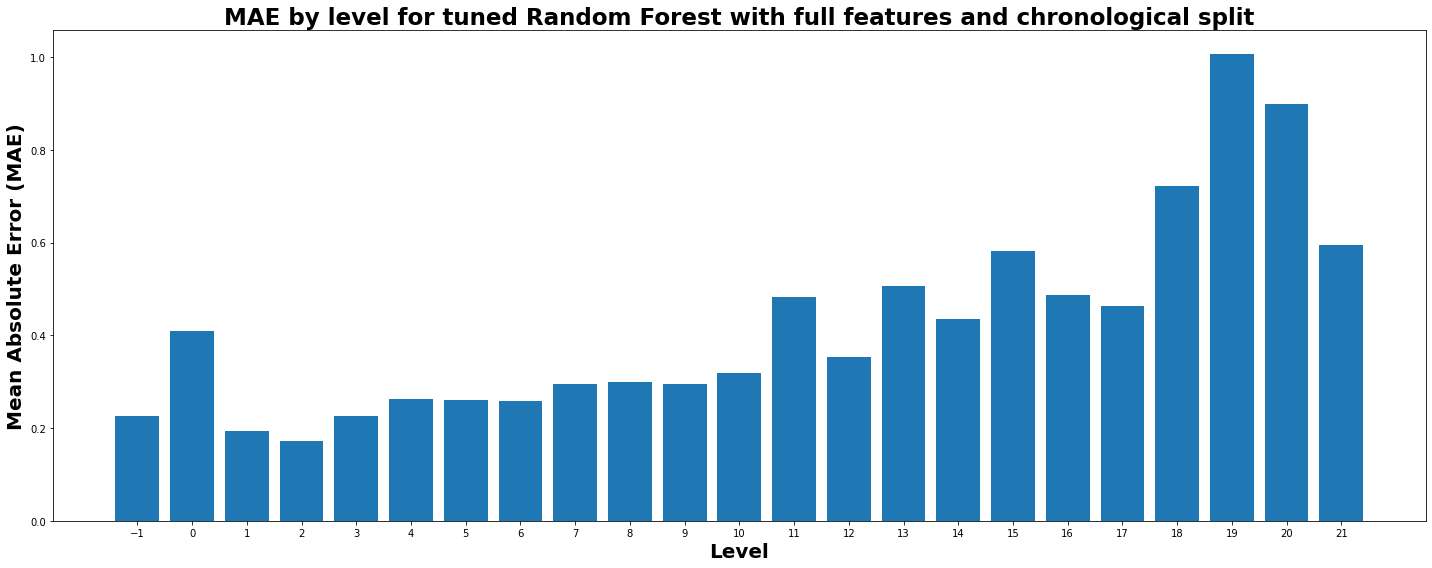

In [22]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for tuned Random Forest with full features and chronological split",
)

In [23]:
evaluate_round_predictions([0.5, 0.33, 0.45], y_test, y_pred_test)

Default:
RMSE: 0.56

Round type: 0.5
RMSE: 0.60

Round type: 0.33
RMSE: 0.57

Round type: 0.45
RMSE: 0.57



### Random split

In [24]:
rf_reg = RandomForestRegressor(n_estimators=500, max_depth=2, random_state=0, n_jobs=-1)
rf_reg.fit(X_train_random_split, y_train_random_split)

RandomForestRegressor(max_depth=2, n_estimators=500, n_jobs=-1, random_state=0)

In [25]:
y_pred_train_random_split = rf_reg.predict(X_train_random_split)
y_pred_test_random_split = rf_reg.predict(X_test_random_split)

In [26]:
rmse = mean_squared_error(y_test_random_split, y_pred_test_random_split, squared=False)
mae = mean_absolute_error(y_test_random_split, y_pred_test_random_split)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 1.47
MAE: 1.17


In [27]:
results.loc[3] = ["random", "default", "full", rmse, mae]

###### MAE by level

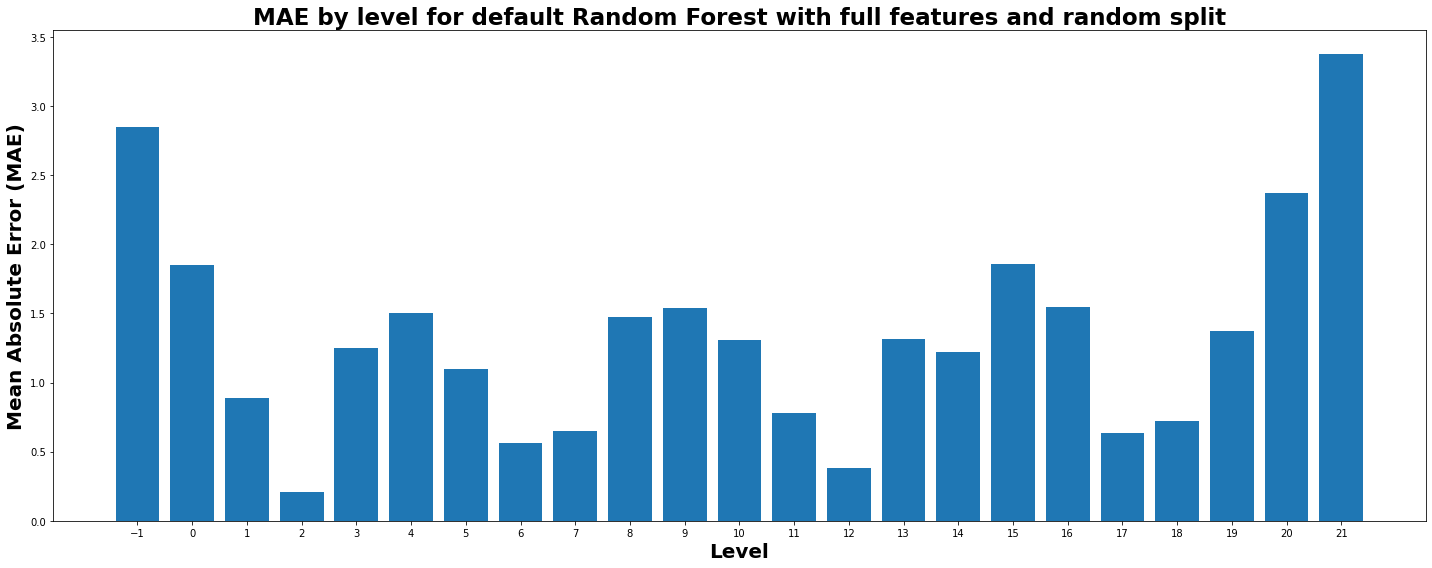

In [28]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test_random_split,
    title="MAE by level for default Random Forest with full features and random split",
)

In [29]:
evaluate_round_predictions(
    [0.5, 0.33, 0.45], y_test_random_split, y_pred_test_random_split
)

Default:
RMSE: 1.47

Round type: 0.5
RMSE: 1.52

Round type: 0.33
RMSE: 1.47

Round type: 0.45
RMSE: 1.51



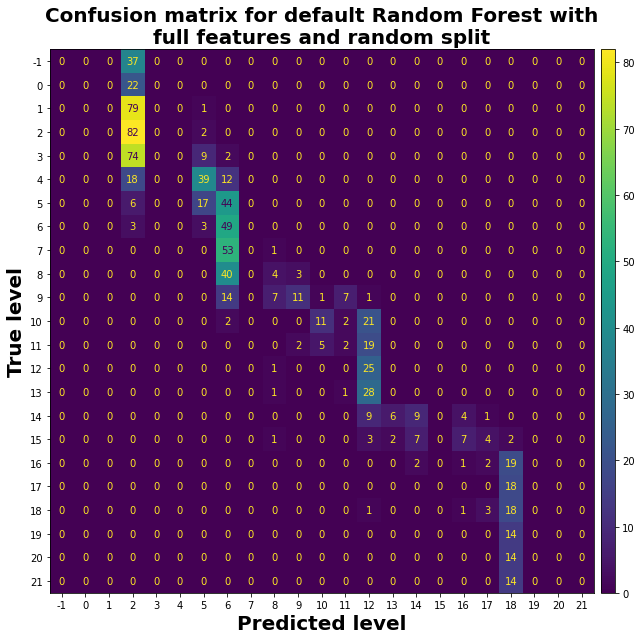

In [30]:
plot_confusion_matrix(
    y_pred_test_random_split,
    y_test_random_split,
    title="Confusion matrix for default Random Forest with\nfull features and random split",
)

#### Tuning

In [31]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=800, num=8)]
max_features = [0.1, 0.2, 0.3, 0.4, 0.5]
max_depth = list(range(10, 111, 10)) + [None]

hyper_params = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
}

hyper_params

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}

In [32]:
rf = RandomForestRegressor(random_state=0, n_jobs=-1)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=hyper_params,
    n_iter=100,
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=2,
    random_state=42,
    return_train_score=True,
)

rf_random.fit(X_train_random_split, y_train_random_split)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ...max_depth=20, max_features=0.5, n_estimators=200; total time=   1.0s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=200; total time=   1.0s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=200; total time=   1.0s
[CV] END ..max_depth=110, max_features=0.2, n_estimators=700; total time=   2.8s
[CV] END ..max_depth=110, max_features=0.2, n_estimators=700; total time=   2.9s
[CV] END ..max_depth=110, max_features=0.2, n_estimators=700; total time=   2.7s
[CV] END ..max_depth=100, max_features=0.5, n_estimators=300; total time=   1.3s
[CV] END ..max_depth=100, max_features=0.5, n_estimators=300; total time=   1.5s
[CV] END ..max_depth=100, max_features=0.5, n_estimators=300; total time=   1.2s
[CV] END ...max_depth=70, max_features=0.5, n_estimators=600; total time=   2.8s
[CV] END ...max_depth=70, max_features=0.5, n_estimators=600; total time=   3.1s
[CV] END ...max_depth=70, max_features=0.5, n_

[CV] END ..max_depth=110, max_features=0.4, n_estimators=700; total time=   2.8s
[CV] END ..max_depth=100, max_features=0.3, n_estimators=200; total time=   0.8s
[CV] END ..max_depth=100, max_features=0.3, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=100, max_features=0.3, n_estimators=200; total time=   0.7s
[CV] END ...max_depth=30, max_features=0.5, n_estimators=600; total time=   2.4s
[CV] END ...max_depth=30, max_features=0.5, n_estimators=600; total time=   2.4s
[CV] END ...max_depth=30, max_features=0.5, n_estimators=600; total time=   2.5s
[CV] END ...max_depth=80, max_features=0.3, n_estimators=700; total time=   2.7s
[CV] END ...max_depth=80, max_features=0.3, n_estimators=700; total time=   2.9s
[CV] END ...max_depth=80, max_features=0.3, n_estimators=700; total time=   2.7s
[CV] END ...max_depth=50, max_features=0.2, n_estimators=600; total time=   2.2s
[CV] END ...max_depth=50, max_features=0.2, n_estimators=600; total time=   2.1s
[CV] END ...max_depth=50, ma

[CV] END ...max_depth=20, max_features=0.4, n_estimators=500; total time=   1.6s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=60, max_features=0.3, n_estimators=300; total time=   0.8s
[CV] END ...max_depth=60, max_features=0.3, n_estimators=300; total time=   0.9s
[CV] END ...max_depth=60, max_features=0.3, n_estimators=300; total time=   0.8s
[CV] END ...max_depth=80, max_features=0.4, n_estimators=700; total time=   2.4s
[CV] END ...max_depth=80, max_features=0.4, n_estimators=700; total time=   2.1s
[CV] END ...max_depth=80, max_features=0.4, n_estimators=700; total time=   2.3s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=800; total time=   3.0s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=800; total time=   2.7s
[CV] END ...max_depth=20, ma

{'n_estimators': 700, 'max_features': 0.4, 'max_depth': 20}

In [33]:
y_pred_test_random_split = rf_random.predict(X_test_random_split)

In [34]:
rmse, mae = assess_regression_model(
    rf_random,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
)

RMSE train: 0.16
RMSE test: 0.37
MAE test: 0.23



In [35]:
results.loc[4] = ["random", "RandomizedSearchCV", "full", rmse, mae]

###### MAE by level

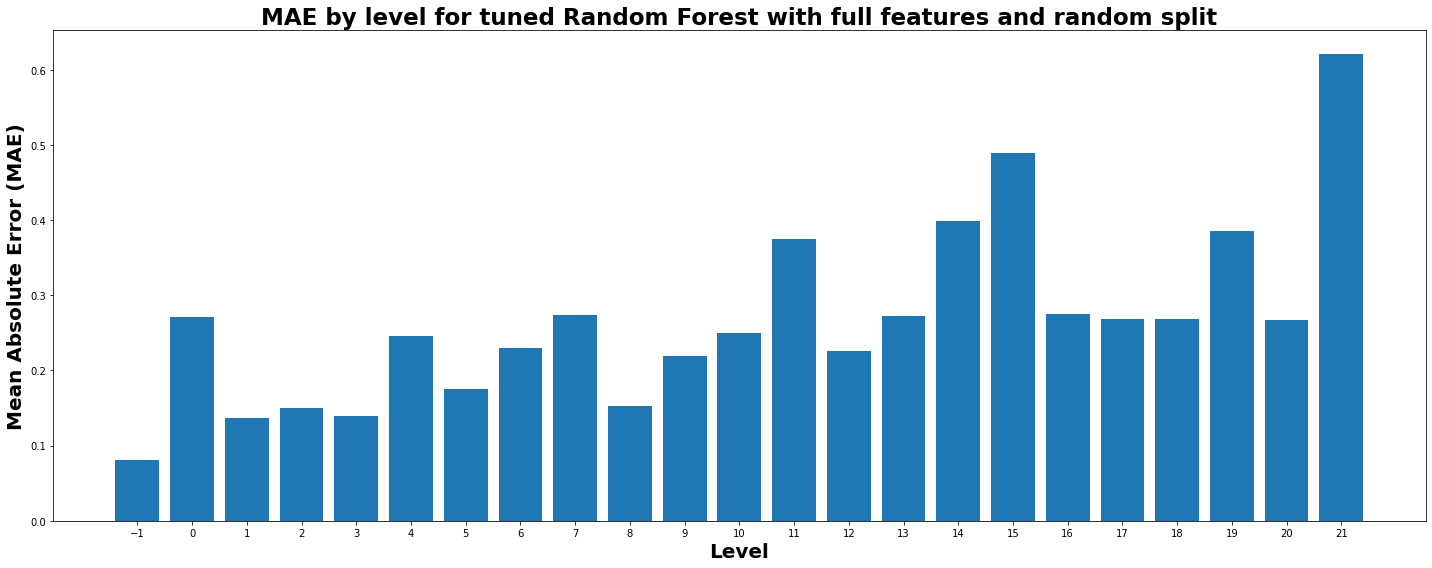

In [36]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test_random_split,
    title="MAE by level for tuned Random Forest with full features and random split",
)

## Summary

In [37]:
results

,Split type,Tuning type,Set of features,RMSE,MAE
0,chronological,default,full,1.594948,1.253155
1,chronological,RandomizedSearchCV,full,0.557629,0.334399
3,random,default,full,1.466061,1.173841
4,random,RandomizedSearchCV,full,0.369365,0.227536


In [38]:
from training.results import plot_summary

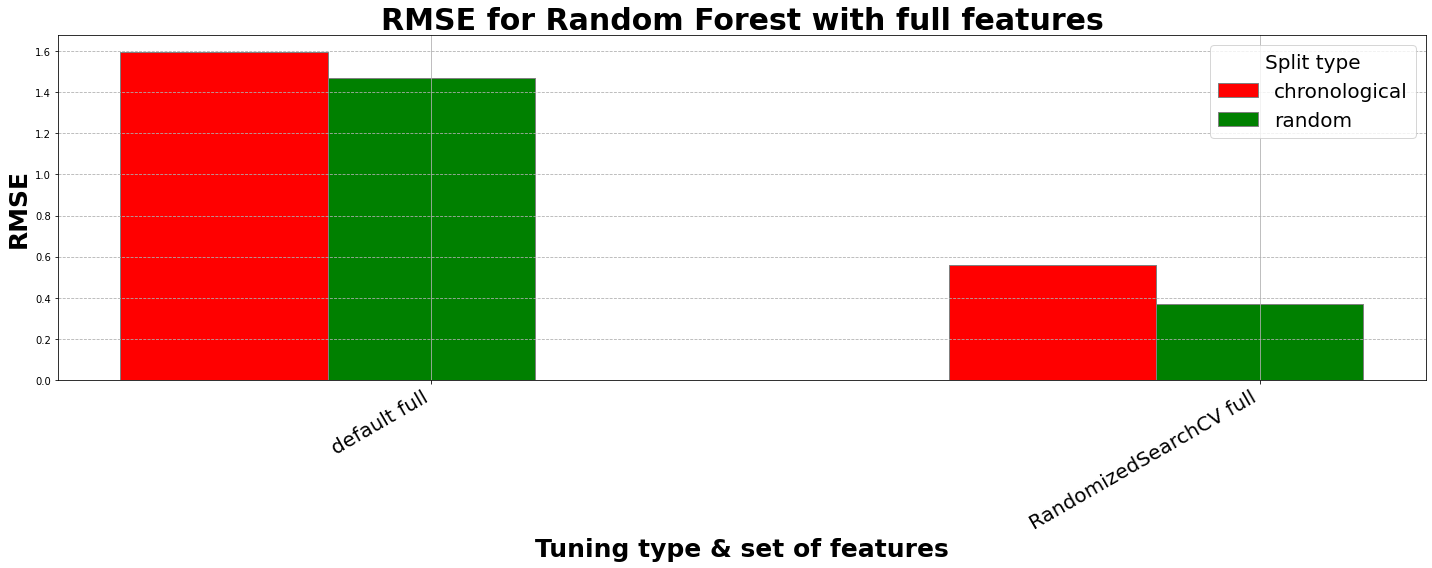

In [39]:
plot_summary(results, "RMSE", title="RMSE for Random Forest with full features")

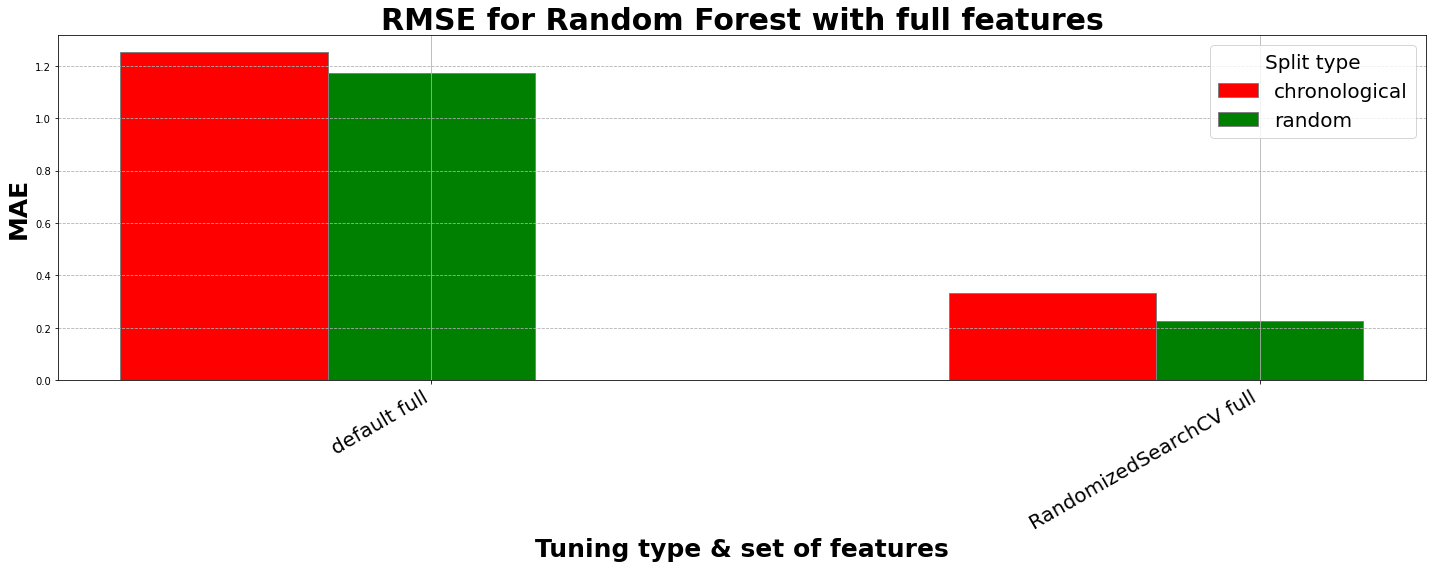

In [40]:
plot_summary(results, "MAE", title="RMSE for Random Forest with full features")

In [41]:
results.to_csv("./random_forest_full_results.csv")